# BCI-Motor imagery Data Preprocessing

- Import data and check stimulus events

In [167]:
import mne
import numpy as np
from mne.datasets import eegbci
from mne.channels import make_standard_montage

raw_edf = mne.io.read_raw_edf("C:\git\Senior_Thesis\DataSet\Convert_data\hand3_new.edf",preload = True)
eegbci.standardize(raw_edf)  # set channel names
montage = make_standard_montage("standard_1005")
raw_edf.set_montage(montage)

Extracting EDF parameters from C:\git\Senior_Thesis\DataSet\Convert_data\hand3_new.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 279249  =      0.000 ...  1116.996 secs...


<RawEDF | hand3_new.edf, 8 x 279250 (1117.0 s), ~17.1 MB, data loaded>

In [168]:
raw_edf.plot(
    duration=100, 
    start=0.0, 
    scalings=500, # You may edit scalings value later
    )
print("...")

...


In [169]:
max(raw_edf[6][0][0])

96972.6

In [170]:
raw_edf.annotations

<Annotations | 727 segments: OVTK_GDF_Cross_On_Screen (120), ...>

# Feature Extraction

- MRCP , LF-ASD

In [171]:
import sys
import matplotlib.pyplot as plt
sys.path.append("..")
from tsfilt import (
    BoxFilter, GaussianFilter, BilateralFilter, IdenticalFilter, NonLocalMeanFilter
)

In [172]:
# eeg1 = raw_edf.copy().filter(l_freq=0.05, h_freq=3.0, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
eeg1 = raw_edf.copy().filter(l_freq=0.075, h_freq=3.0, method = 'fir')
# eeg1 = eeg1.copy().filter(l_freq=0.0, h_freq=0.075, method = 'fir')
eeg1 = eeg1.copy().set_eeg_reference(ref_channels="average")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.075 - 3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.07
- Lower transition bandwidth: 0.07 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 3.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 11001 samples (44.004 s)



EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


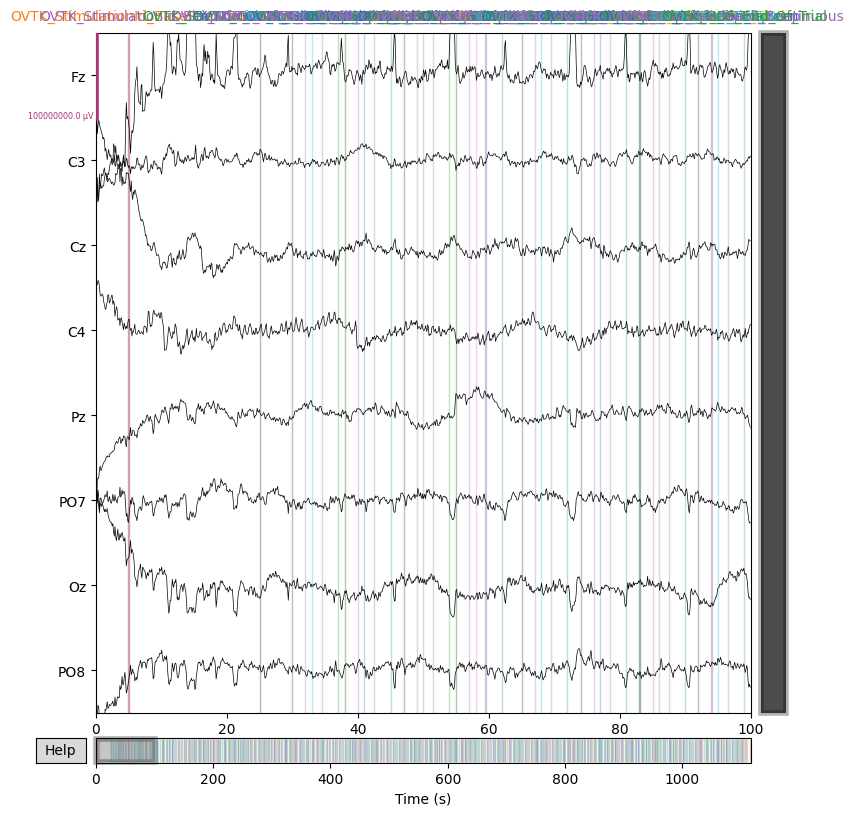

In [173]:
eeg1.plot(scalings = 50, duration=100)

In [174]:
max(eeg1[0][0][0])

3686.6699946733147

In [175]:
eeg1= eeg1.pick_channels(['C3','Cz','C4'])
events, event_dict = mne.events_from_annotations(eeg1)
epochs = mne.Epochs(eeg1, events, 
        tmin=-5.0,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax=5.0,    # final timestamp (10 means set epoch duration 10 second)
        event_id=event_dict,
        preload = True,
        event_repeated='drop'
    )

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_End_Of_Session', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Feedback_Continuous', 'OVTK_GDF_Incorrect', 'OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Start_Of_Trial', 'OVTK_GDF_Tongue', 'OVTK_GDF_Up', 'OVTK_StimulationId_BaselineStart', 'OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Beep', 'OVTK_StimulationId_Train']
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
605 matching events found
Setting baseline interval to [-5.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 605 events and 2501 original time points ...
2 bad epochs dropped


In [176]:
epochs

<Epochs |  603 events (all good), -5 – 5 s, baseline -5 – 0 s, ~34.5 MB, data loaded,
 'OVTK_GDF_Cross_On_Screen': 1
 'OVTK_GDF_End_Of_Session': 1
 'OVTK_GDF_End_Of_Trial': 120
 'OVTK_GDF_Feedback_Continuous': 120
 'OVTK_GDF_Left': 30
 'OVTK_GDF_Right': 30
 'OVTK_GDF_Start_Of_Trial': 120
 'OVTK_GDF_Tongue': 30
 'OVTK_GDF_Up': 30
 'OVTK_StimulationId_BaselineStart': 0
 and 3 more events ...>

In [177]:
# def display(x, x_filt, title):
#     plt.figure(figsize=(20, 3))
#     plt.plot(x, "-", label="original")
#     plt.plot(x_filt, "-", label="filtered")
#     plt.title(title)
#     plt.legend()
#     plt.show()

# WIN_SIZE = 1125
# Select_channel = 3
# filters = {
#     # "box": BoxFilter(WIN_SIZE),
#     "gaussian": GaussianFilter(WIN_SIZE, sigma_d=20),
#     # "bilateral": BilateralFilter(WIN_SIZE, sigma_d=15, sigma_i=7.5),
#     # "non local mean": NonLocalMeanFilter(WIN_SIZE)
# }
# # print(filters.items())
# left_epochs = epochs['OVTK_GDF_Left']
# right_epochs = epochs['OVTK_GDF_Right']
# up_epochs = epochs['OVTK_GDF_Up']
# for filter_name,filt in filters.items():
#     for j in range(0,Select_channel):
#         for i in range(0,len(epochs['OVTK_GDF_Left'])):
#             left_filt = filt.fit_transform(left_epochs.get_data()[i][j])
#             left_epochs._data[i][j] = left_filt
#             right_filt = filt.fit_transform(right_epochs.get_data()[i][j])
#             right_epochs._data[i][j] = right_filt
#             up_filt = filt.fit_transform(up_epochs.get_data()[i][j])
#             up_epochs._data[i][j] = up_filt

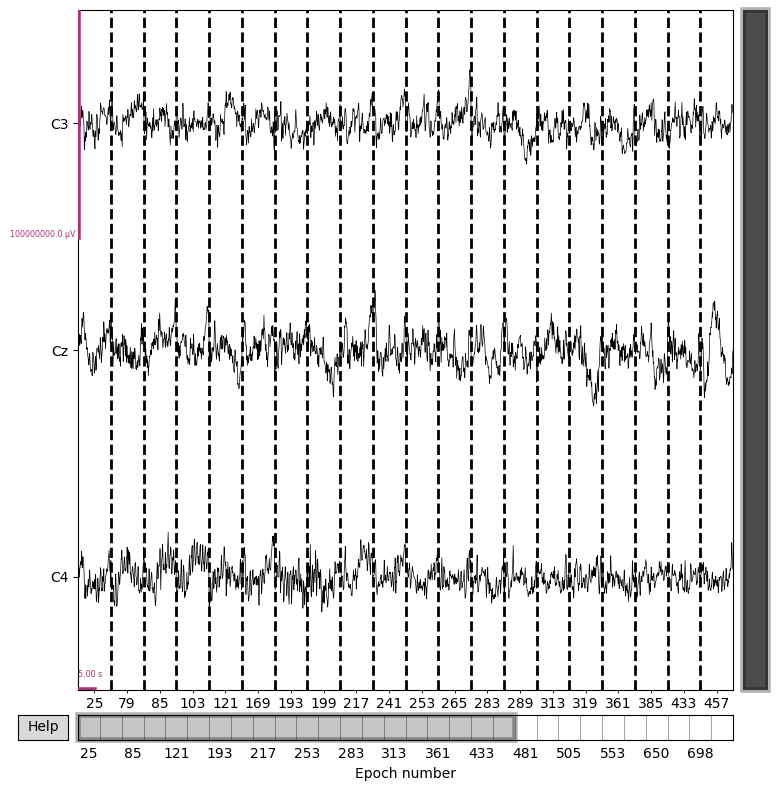

...


In [178]:
epochs['OVTK_GDF_Left'].plot(
    scalings=50, # You may edit scalings value later
)
print('...')

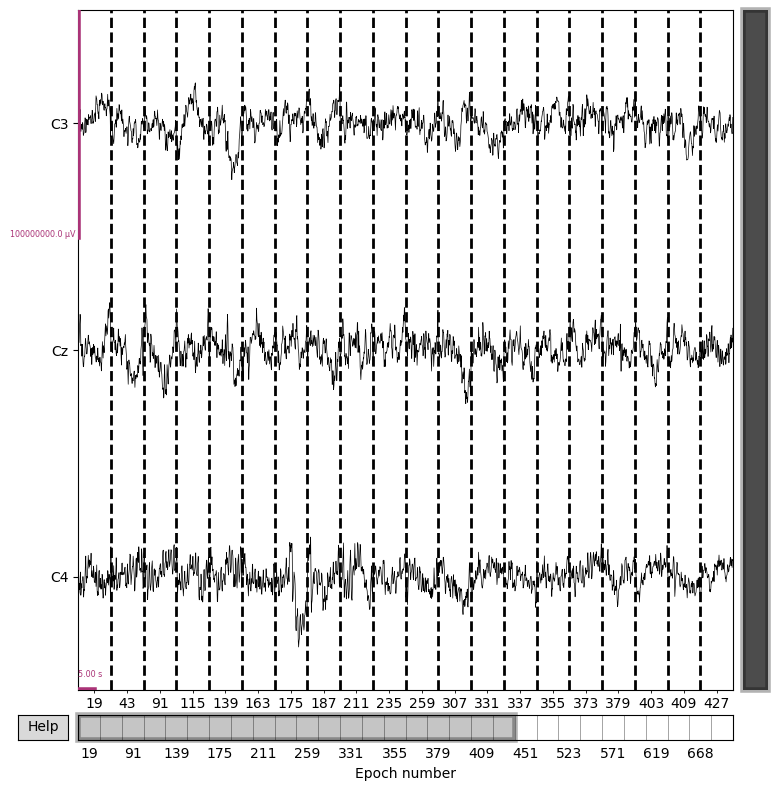

...


In [179]:
epochs['OVTK_GDF_Right'].plot(
    scalings=50, # You may edit scalings value later
)
print('...')

In [180]:
epochs['OVTK_GDF_Up'].plot(
    scalings=50, # You may edit scalings value later
)
print('...')

...


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


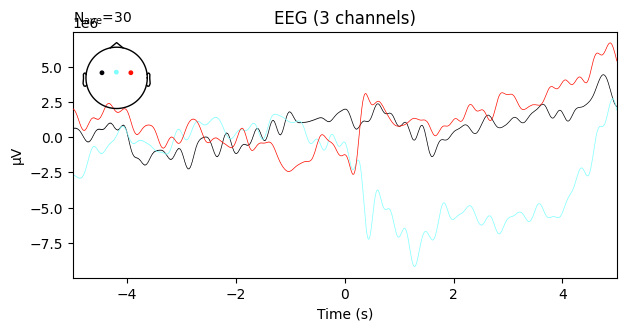

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


...


In [181]:
epochs['OVTK_GDF_Up'].average().plot()
epochs['OVTK_GDF_Left'].average().plot()
epochs['OVTK_GDF_Right'].average().plot()
epochs['OVTK_GDF_Tongue'].average().plot()
print('...')

- ERD/ERS

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import pandas as pd
import seaborn as sns
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test

In [183]:
# eeg2 = raw_edf.copy().filter(l_freq=1.0, h_freq=35.0, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
eeg2 = raw_edf.copy().filter(l_freq=1.0, h_freq=35.0, method = 'fir')
eeg2 = eeg2.copy().set_eeg_reference(ref_channels="average")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 825 samples (3.300 s)



EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


In [184]:
events, _ = mne.events_from_annotations(eeg2, event_id=dict(OVTK_GDF_Left=1, OVTK_GDF_Right=2, OVTK_GDF_Up=3))
event_ids = dict(OVTK_GDF_Left=1, OVTK_GDF_Right=2, OVTK_GDF_Up=3)
erds_epochs = mne.Epochs(eeg2, events,event_ids,
        tmin = -2.0,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax = 4.5,    # final timestamp (10 means set epoch duration 10 second)
        picks=("C3", "Cz", "C4"),
        preload = True,
        event_repeated='drop'
    )

Used Annotations descriptions: ['OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Up']
Not setting metadata
90 matching events found
Setting baseline interval to [-2.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 90 events and 1626 original time points ...
0 bad epochs dropped


In [185]:
freqs = np.arange(1, 36)  # frequencies from 2-35Hz
vmin, vmax = -1, 1.0  # set min and max ERDS values in plot
baseline = (-1, 0)  # baseline interval (in s)
cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # min, center & max ERDS

kwargs = dict(
    n_permutations=100, step_down_p=0.05, seed=1, buffer_size=None, out_type="mask"
)  # for cluster test

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


Not setting metadata
Applying baseline correction (mode: percent)
Using a threshold of 1.699127
stat_fun(H1): min=-4.611324 max=4.888905
Running initial clustering …
Found 60 clusters


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s finished
100%|██████████| Permuting : 99/99 [00:00<00:00,  149.35it/s]

Step-down-in-jumps iteration #1 found 2 clusters to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  153.29it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-4.611324 max=4.888905


Running initial clustering …
Found 25 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  151.09it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


No baseline correction applied
Using a threshold of 1.699127
stat_fun(H1): min=-5.778370 max=4.849667
Running initial clustering …
Found 70 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  144.52it/s]

Step-down-in-jumps iteration #1 found 5 clusters to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  149.73it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-5.778370 max=4.849667


Running initial clustering …
Found 35 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  149.72it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


Using a threshold of 1.699127
stat_fun(H1): min=-6.228899 max=6.462750
Running initial clustering …
Found 83 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  149.95it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  148.80it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-6.228899 max=6.462750
Running initial clustering …
Found 51 clusters



100%|██████████| Permuting : 99/99 [00:00<00:00,  148.77it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


Using a threshold of 1.699127
stat_fun(H1): min=-6.861509 max=3.182122
Running initial clustering …
Found 90 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  148.72it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-6.861509 max=3.182122
Running initial clustering …
Found 51 clusters



100%|██████████| Permuting : 99/99 [00:00<00:00,  150.32it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  149.07it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.699127
stat_fun(H1): min=-3.318331 max=3.448352
Running initial clustering …
Found 67 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  156.08it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  156.57it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-3.318331 max=3.448352


Running initial clustering …
Found 47 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  156.11it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


Using a threshold of 1.699127
stat_fun(H1): min=-5.054813 max=3.659073
Running initial clustering …
Found 87 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  155.74it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  155.00it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-5.054813 max=3.659073
Running initial clustering …


Found 72 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  155.03it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


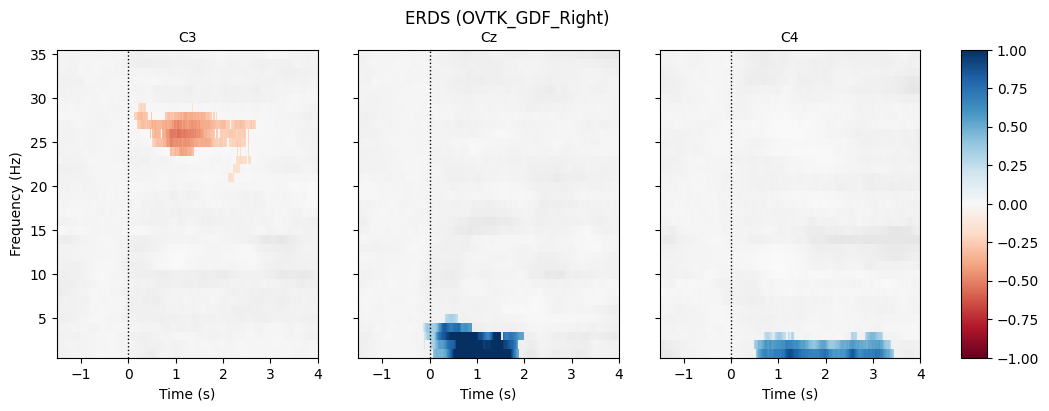

Using a threshold of 1.699127
stat_fun(H1): min=-4.465445 max=4.109610
Running initial clustering …
Found 78 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  154.47it/s]

Step-down-in-jumps iteration #1 found 2 clusters to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  159.31it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-4.465445 max=4.109610
Running initial clustering …
Found 28 clusters



100%|██████████| Permuting : 99/99 [00:00<00:00,  157.45it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
Using a threshold of 1.699127
stat_fun(H1): min=-4.713977 max=4.627782
Running initial clustering …
Found 100 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  156.55it/s]

Step-down-in-jumps iteration #1 found 2 clusters to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  158.49it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations


Using a threshold of -1.699127
stat_fun(H1): min=-4.713977 max=4.627782
Running initial clustering …
Found 38 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  157.07it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


Using a threshold of 1.699127
stat_fun(H1): min=-4.439355 max=4.222990
Running initial clustering …
Found 70 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  157.54it/s]

Step-down-in-jumps iteration #1 found 2 clusters to exclude from subsequent iterations



100%|██████████| Permuting : 99/99 [00:00<00:00,  158.55it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.699127
stat_fun(H1): min=-4.439355 max=4.222990


Running initial clustering …
Found 31 clusters


100%|██████████| Permuting : 99/99 [00:00<00:00,  156.36it/s]


Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


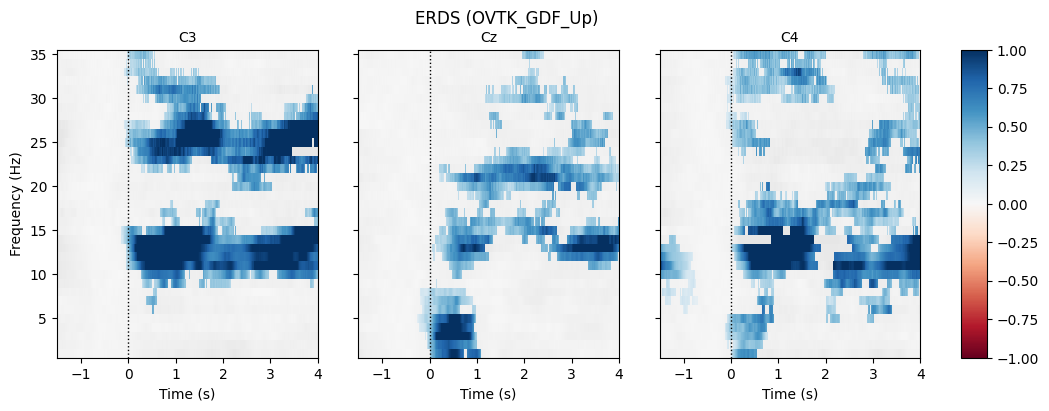

In [186]:
tfr = tfr_multitaper(
    erds_epochs,
    freqs=freqs,
    n_cycles=freqs,
    use_fft=True,
    return_itc=False,
    average=False,
    decim=2,
)
tfr.crop(-1.5, 4).apply_baseline(baseline, mode="percent")

for event in event_ids:
    # select desired epochs for visualization
    tfr_ev = tfr[event]
    fig, axes = plt.subplots(
        1, 4, figsize=(12, 4), gridspec_kw={"width_ratios": [10, 10, 10, 1]}
    )
    for ch, ax in enumerate(axes[:-1]):  # for each channel
        # positive clusters
        _, c1, p1, _ = pcluster_test(tfr_ev.data[:, ch], tail=1, **kwargs)
        # negative clusters
        _, c2, p2, _ = pcluster_test(tfr_ev.data[:, ch], tail=-1, **kwargs)

        # note that we keep clusters with p <= 0.05 from the combined clusters
        # of two independent tests; in this example, we do not correct for
        # these two comparisons
        c = np.stack(c1 + c2, axis=2)  # combined clusters
        p = np.concatenate((p1, p2))  # combined p-values
        mask = c[..., p <= 0.05].any(axis=-1)

        # plot TFR (ERDS map with masking)
        tfr_ev.average().plot(
            [ch],
            cmap="RdBu",
            cnorm=cnorm,
            axes=ax,
            colorbar=False,
            show=False,
            mask=mask,
            mask_style="mask",
        )

        ax.set_title(epochs.ch_names[ch], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS ({event})")
    plt.show()

In [187]:
# df = tfr.to_data_frame(time_format=None, long_format=True)

# # Map to frequency bands:
# freq_bounds = {"_": 0, "delta": 3, "theta": 7, "alpha": 13, "beta": 35, "gamma": 140}
# df["band"] = pd.cut(
#     df["freq"], list(freq_bounds.values()), labels=list(freq_bounds)[1:]
# )

# # Filter to retain only relevant frequency bands:
# freq_bands_of_interest = ["delta", "theta", "alpha", "beta"]
# df = df[df.band.isin(freq_bands_of_interest)]
# df["band"] = df["band"].cat.remove_unused_categories()

# # Order channels for plotting:
# df["channel"] = df["channel"].cat.reorder_categories(("C3", "Cz", "C4"), ordered=True)

# g = sns.FacetGrid(df, row="band", col="channel", margin_titles=True)
# g.map(sns.lineplot, "time", "value", "condition", n_boot=10)
# axline_kw = dict(color="black", linestyle="dashed", linewidth=0.5, alpha=0.5)
# g.map(plt.axhline, y=0, **axline_kw)
# g.map(plt.axvline, x=0, **axline_kw)
# g.set(ylim=(None, vmax))
# g.set_axis_labels("Time (s)", "ERDS")
# g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.add_legend(ncol=2, loc="lower center")
# g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.08)
# plt.show()

- CSP

In [188]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit,StratifiedKFold ,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from mne import Epochs, pick_types, events_from_annotations, create_info
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.time_frequency import AverageTFR

In [203]:
# eeg3 = raw_edf.copy().filter(l_freq=0.1, h_freq=3.0, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
eeg3 = raw_edf.copy().filter(l_freq=8.0, h_freq=30.0, method = 'fir')
# eeg3 = eeg3.copy().set_eeg_reference(ref_channels="average")
events, _ = mne.events_from_annotations(eeg3, event_id=dict(OVTK_GDF_Left=1, OVTK_GDF_Right=2, OVTK_GDF_Up=3, OVTK_GDF_Tongue = 4))
event_ids = dict(OVTK_GDF_Left=1, OVTK_GDF_Right=2, OVTK_GDF_Up=3, OVTK_GDF_Tongue=4)
CSP_epochs = mne.Epochs(eeg3, events,event_ids,
        tmin = -1.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax = 4.0,    # final timestamp (10 means set epoch duration 10 second)
        picks=("Fz","C3", "Cz", "C4","Pz"),
        proj=True,
        preload = True,
        baseline=None,
        event_repeated='drop'
    )
CSP_train = CSP_epochs.copy().crop(tmin=0.0, tmax=4.0)
labels = CSP_epochs.events[:, -1]

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



Used Annotations descriptions: ['OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Tongue', 'OVTK_GDF_Up']
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 1376 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


In [204]:
# Define a monte-carlo cross-validation generator (reduce variance):
scores = []
CSP_epochs_data = CSP_epochs.get_data()
CSP_epochs_data_train = CSP_train.get_data()
cv = ShuffleSplit(5, test_size=0.2, random_state=42)
cv_split = cv.split(CSP_epochs_data_train)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([("CSP", csp), ("LDA", lda)])
scores = cross_val_score(clf, CSP_epochs_data_train, labels, cv=cv, n_jobs=None)
CSP_predicted = cross_val_predict(clf, CSP_epochs_data_train, labels, cv=5)
# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1.0 - class_balance)

# plot CSP patterns estimated on full data for visualization
CSP_coff = csp.fit_transform(CSP_epochs_data, labels)

csp.plot_patterns(CSP_epochs.info, ch_type="eeg", units="Patterns (AU)", size=1.5)

print(
    "Classification accuracy: %f / Chance level: %f" % (np.mean(scores), class_balance)
)

conf_matrix = confusion_matrix(labels, CSP_predicted)
print(conf_matrix)


Computing rank from data with rank=None
    Using tolerance 1.5 (2.2e-16 eps * 4 dim * 1.7e+15  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5 (2.2e-16 eps * 4 dim * 1.7e+15  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.


Computing rank from data with rank=None
    Using tolerance 1.5 (2.2e-16 eps * 4 dim * 1.7e+15  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4 (2.2e-16 eps * 4 dim * 1.6e+15  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5 (2.2e-16 eps * 4 dim * 1.7e+15  max singular value)
    Estimated rank (mag): 4
    MAG: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5 (2.2e-16 eps * 4 dim * 1.7e+15  max singular value)
    Estimated rank (mag): 4
    MAG

Classification accuracy: 0.475000 / Chance level: 0.750000
[[23  5  2  0]
 [ 5 16  4  5]
 [ 4  1 16  9]
 [ 3  6  9 12]]


In [191]:
shape = np.shape(CSP_train.pick(["C3","Cz","C4"]).get_data())
array_2d = CSP_train.pick(["C3","Cz","C4"]).get_data().reshape(shape[0], shape[1]*shape[2])

scores = cross_val_score(lda, array_2d, labels, cv=cv, n_jobs=None)
CSP_predicted = cross_val_predict(lda, array_2d, labels, cv=10)

conf_matrix = confusion_matrix(labels, CSP_predicted)
print("LDA only classification scores", np.mean(scores))
print(conf_matrix)

LDA only classification scores 0.18333333333333332
[[ 9  9  9  3]
 [ 8  9  6  7]
 [14  9  3  4]
 [ 8 12  4  6]]


Computing rank from data with rank=None
    Using tolerance 2 (2.2e-16 eps * 5 dim * 1.8e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2 (2.2e-16 eps * 5 dim * 1.8e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.


Computing rank from data with rank=None
    Using tolerance 2 (2.2e-16 eps * 5 dim * 1.8e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.9 (2.2e-16 eps * 5 dim * 1.7e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2 (2.2e-16 eps * 5 dim * 1.8e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.1 (2.2e-16 eps * 5 dim * 1.9e+15  max singular value)
    Estimated rank (mag): 5
    MAG: ra

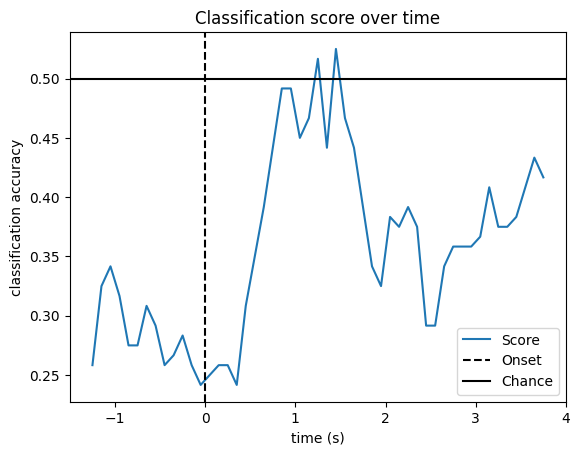

In [192]:
sfreq = eeg3.info["sfreq"]
w_length = int(sfreq * 0.5)  # running classifier: window length
w_step = int(sfreq * 0.1)  # running classifier: window step size
w_start = np.arange(0, CSP_epochs_data.shape[2] - w_length, w_step)

scores_windows = []

for train_idx, test_idx in cv_split:
    y_train, y_test = labels[train_idx], labels[test_idx]

    X_train = csp.fit_transform(CSP_epochs_data_train[train_idx], y_train)
    X_test = csp.transform(CSP_epochs_data_train[test_idx])

    # fit classifier
    lda.fit(X_train, y_train)

    # running classifier: test classifier on sliding window
    score_this_window = []
    for n in w_start:
        X_test = csp.transform(CSP_epochs_data[test_idx][:, :, n : (n + w_length)])
        score_this_window.append(lda.score(X_test, y_test))
    scores_windows.append(score_this_window)

# Plot scores over time
w_times = (w_start + w_length / 2.0) / sfreq + CSP_epochs.tmin

plt.figure()
plt.plot(w_times, np.mean(scores_windows, 0), label="Score")
plt.axvline(0, linestyle="--", color="k", label="Onset")
plt.axhline(0.5, linestyle="-", color="k", label="Chance")
plt.xlabel("time (s)")
plt.ylabel("classification accuracy")
plt.title("Classification score over time")
plt.legend(loc="lower right")
plt.show()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 5.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 5.14 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.14 Hz)
- Filter length: 825 samples (3.300 s)



Not setting metadata
120 matching events found
No baseline correction applied
Using data from preloaded Raw for 120 events and 2504 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 4.8 (2.2e-16 eps * 5 dim * 4.3e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.9 (2.2e-16 eps * 5 dim * 4.4e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.6 (2.2e-16 eps * 5 dim * 4.2e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covari

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


Computing rank from data with rank=None
    Using tolerance 4.4 (2.2e-16 eps * 5 dim * 3.9e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4.8 (2.2e-16 eps * 5 dim * 4.3e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.1 (2.2e-16 eps * 5 dim * 4.6e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 4 (2.2e-16 eps * 5 dim * 3.6e+15  max singular value)
    Estimated rank (mag): 5
    MAG: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.8 (2.2e-16 eps * 5 dim * 1.6e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.9 (2.2e-16 eps * 5 dim * 1.7e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5 (2.2e-16 eps * 5 dim * 1.4e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.7 (2.2e-16 eps * 5 dim * 1.5e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5 (2.2e-16 eps * 5 dim * 1.3e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.6 (2.2e-16 eps * 5 dim * 1.4e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5 (2.2e-16 eps

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


    Using tolerance 1.1 (2.2e-16 eps * 5 dim * 1e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.2 (2.2e-16 eps * 5 dim * 1.1e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1 (2.2e-16 eps * 5 dim * 9.4e+14  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.1 (2.2e-16 eps * 5 dim * 1e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


    Using tolerance 0.97 (2.2e-16 eps * 5 dim * 8.7e+14  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.98 (2.2e-16 eps * 5 dim * 8.8e+14  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.85 (2.2e-16 eps * 5 dim * 7.7e+14  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.93 (2.2e-16 eps * 5 dim * 8.4e+14  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


    Using tolerance 0.99 (2.2e-16 eps * 5 dim * 9e+14  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.99 (2.2e-16 eps * 5 dim * 8.9e+14  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.86 (2.2e-16 eps * 5 dim * 7.7e+14  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.97 (2.2e-16 eps * 5 dim * 8.8e+14  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


    Using tolerance 0.89 (2.2e-16 eps * 5 dim * 8e+14  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1 (2.2e-16 eps * 5 dim * 9e+14  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.97 (2.2e-16 eps * 5 dim * 8.7e+14  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.85 (2.2e-16 eps * 5 dim * 7.7e+14  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with

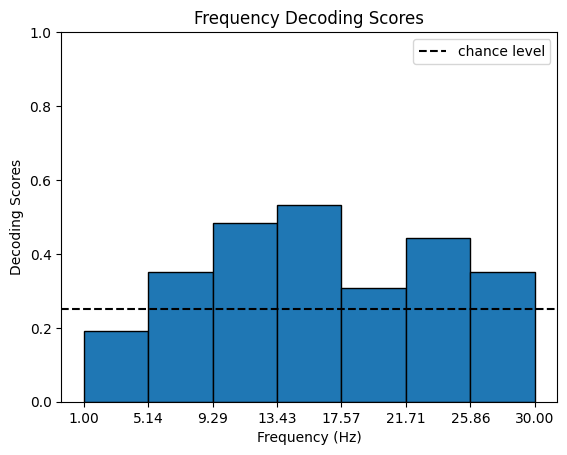

In [193]:
# Classification & time-frequency parameters
tmin, tmax = 0.000, 3.500
n_cycles = 10.0  # how many complete cycles: used to define window size
min_freq = 1.0
max_freq = 30.0
n_freqs = 8 # how many frequency bins to use

# Assemble list of frequency range tuples
freqs = np.linspace(min_freq, max_freq, n_freqs)  # assemble frequencies
freq_ranges = list(zip(freqs[:-1], freqs[1:]))  # make freqs list of tuples

# Infer window spacing from the max freq and number of cycles to avoid gaps
window_spacing = n_cycles / np.max(freqs) / 2.0
centered_w_times = np.arange(tmin, tmax, window_spacing)[1:]
n_windows = len(centered_w_times)

# Instantiate label encoder
le = LabelEncoder()

freq_scores = np.zeros((n_freqs - 1,))

# Loop through each frequency range of interest
for freq, (fmin, fmax) in enumerate(freq_ranges):
    # Infer window size based on the frequency being used
    w_size = n_cycles / ((fmax + fmin) / 2.0)  # in seconds

    # Apply band-pass filter to isolate the specified frequencies
    CSP_filter = raw_edf.copy().filter(
        fmin, fmax, fir_design="firwin", skip_by_annotation="edge"
    )

    # Extract epochs from filtered data, padded by window size
    CSP_epochs2 = Epochs(
        CSP_filter,
        events,
        event_ids,
        tmin - w_size,
        tmax + w_size,
        picks=("Fz","C3", "Cz", "C4","Pz"),
        proj=False,
        baseline=None,
        preload=True,
    )
    # CSP_epochs2.drop_bad()
    y = le.fit_transform(CSP_epochs2.events[:, 2])

    X = CSP_epochs2.get_data()

    # Save mean scores over folds for each frequency and time window
    freq_scores[freq] = np.mean(
        cross_val_score(estimator=clf, X=X, y=y, cv=cv), axis=0
    )

plt.bar(
    freqs[:-1], freq_scores, width=np.diff(freqs)[0], align="edge", edgecolor="black"
)
plt.xticks(freqs)
plt.ylim([0, 1])
plt.axhline(
    len(CSP_epochs2["OVTK_GDF_Up"]) / len(CSP_epochs2), color="k", linestyle="--", label="chance level"
)
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Decoding Scores")
plt.title("Frequency Decoding Scores")
plt.show()

- PSD & Power Plot

In [194]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne import io
from mne.datasets import sample
from mne.minimum_norm import read_inverse_operator, source_induced_power

eeg4 = raw_edf.copy().filter(l_freq=1.0, h_freq=35.0, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
eeg4 = eeg4.copy().set_eeg_reference(ref_channels="average")
picks = ("Fz","C3", "Cz", "C4","Pz")
epochs_name = ['OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Up']

events, _ = mne.events_from_annotations(eeg4, event_id=dict(OVTK_GDF_Left=1, OVTK_GDF_Right=2, OVTK_GDF_Up=3))
event_ids = dict(OVTK_GDF_Left=1, OVTK_GDF_Right=2, OVTK_GDF_Up=3)
PSD_epochs = mne.Epochs(eeg4, events,event_ids,
        tmin = -1.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax = 4.0,    # final timestamp (10 means set epoch duration 10 second)
        picks=picks,
        proj=True,
        preload = True,
        baseline=None,
        event_repeated='drop'
    )


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 1.00, 35.00 Hz: -6.02, -6.02 dB

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Up']
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 90 events and 1376 original time points ...
0 bad epochs dropped


Effective window size : 8.192 (s)


...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


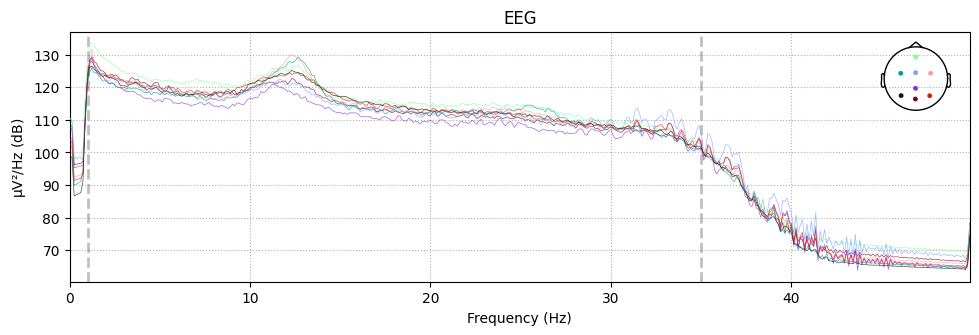

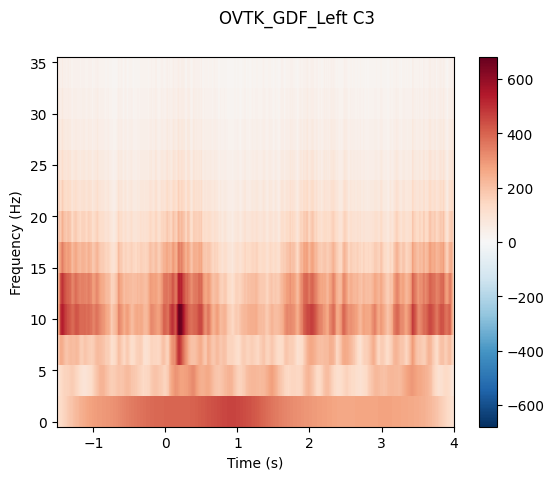

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


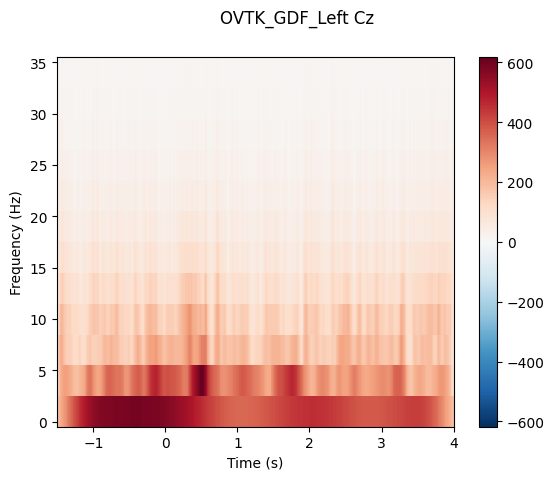

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


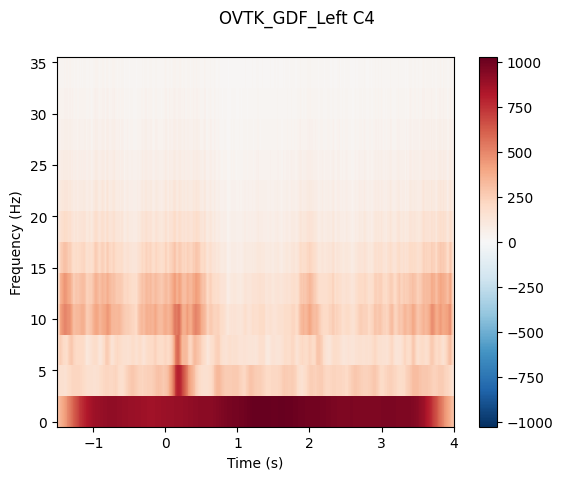

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


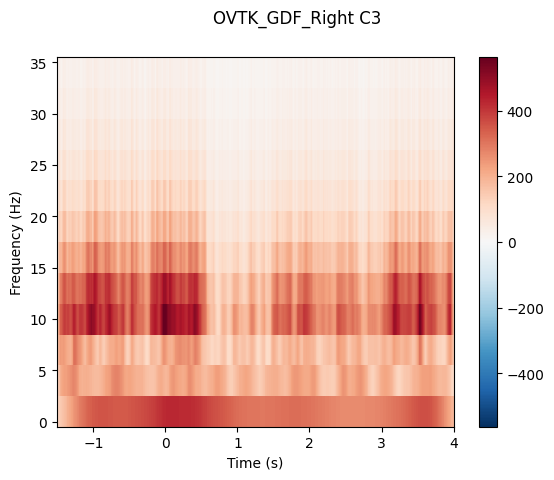

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


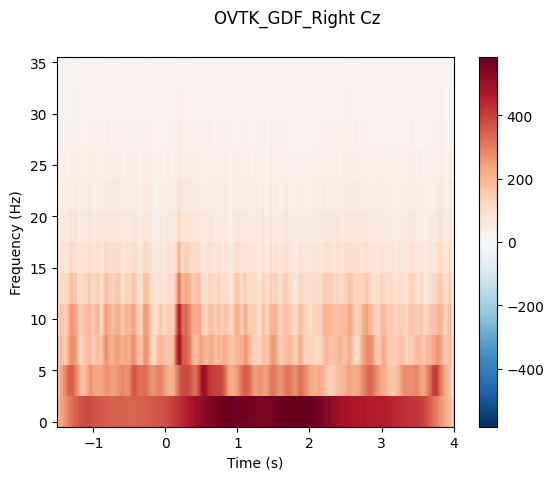

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


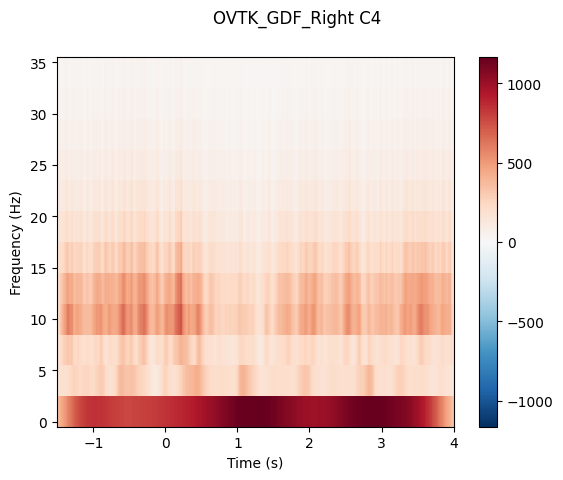

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


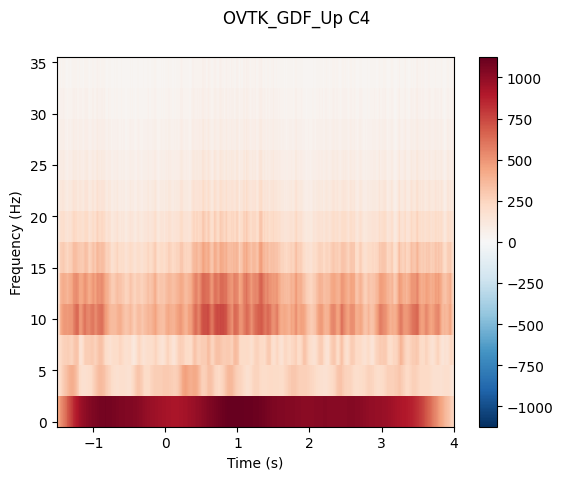

In [195]:
eeg4.compute_psd(fmax=50).plot(picks="data", exclude="bads")
print("...")
frequencies = np.arange(1, 35, 3)
for i in range(0,3):
    power = mne.time_frequency.tfr_morlet(
        PSD_epochs[epochs_name[i]], n_cycles=2, return_itc=False, freqs=frequencies, decim=3)
    for j in range(0,3):
        power.plot(picks = picks[j+1], title = str(epochs_name[i]) + " " + str(picks[j+1]))

- CWT & STFT

In [196]:
import numpy as np
import pywt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import numpy as np
import torch
import torch.nn as nn
from scipy import signal
from scipy import optimize
from pathlib import Path
from IPython.display import Image
from timm.models.layers import conv2d_same

In [197]:
eeg5 = raw_edf.copy().filter(l_freq=1.0, h_freq=35.0, method = 'iir', iir_params= {"order": 12, "ftype":'butter'})
eeg5 = eeg5.copy().set_eeg_reference(ref_channels="average")
picks = ("Fz","C3", "Cz", "C4","Pz")
epochs_name = ['OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Up']

events, _ = mne.events_from_annotations(eeg5, event_id=dict(OVTK_GDF_Left=1, OVTK_GDF_Right=2, OVTK_GDF_Up=3))
event_ids = dict(OVTK_GDF_Left=1, OVTK_GDF_Right=2, OVTK_GDF_Up=3)
CWT_epochs = mne.Epochs(eeg5, events,event_ids,
        tmin = -1.5,     # init timestamp of epoch (0 means trigger timestamp same as event start)
        tmax = 4.0,    # final timestamp (10 means set epoch duration 10 second)
        picks=picks,
        proj=True,
        preload = True,
        baseline=None,
        event_repeated='drop'
    )

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 48 (effective, after forward-backward)
- Cutoffs at 1.00, 35.00 Hz: -6.02, -6.02 dB



EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Up']
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 90 events and 1376 original time points ...
0 bad epochs dropped


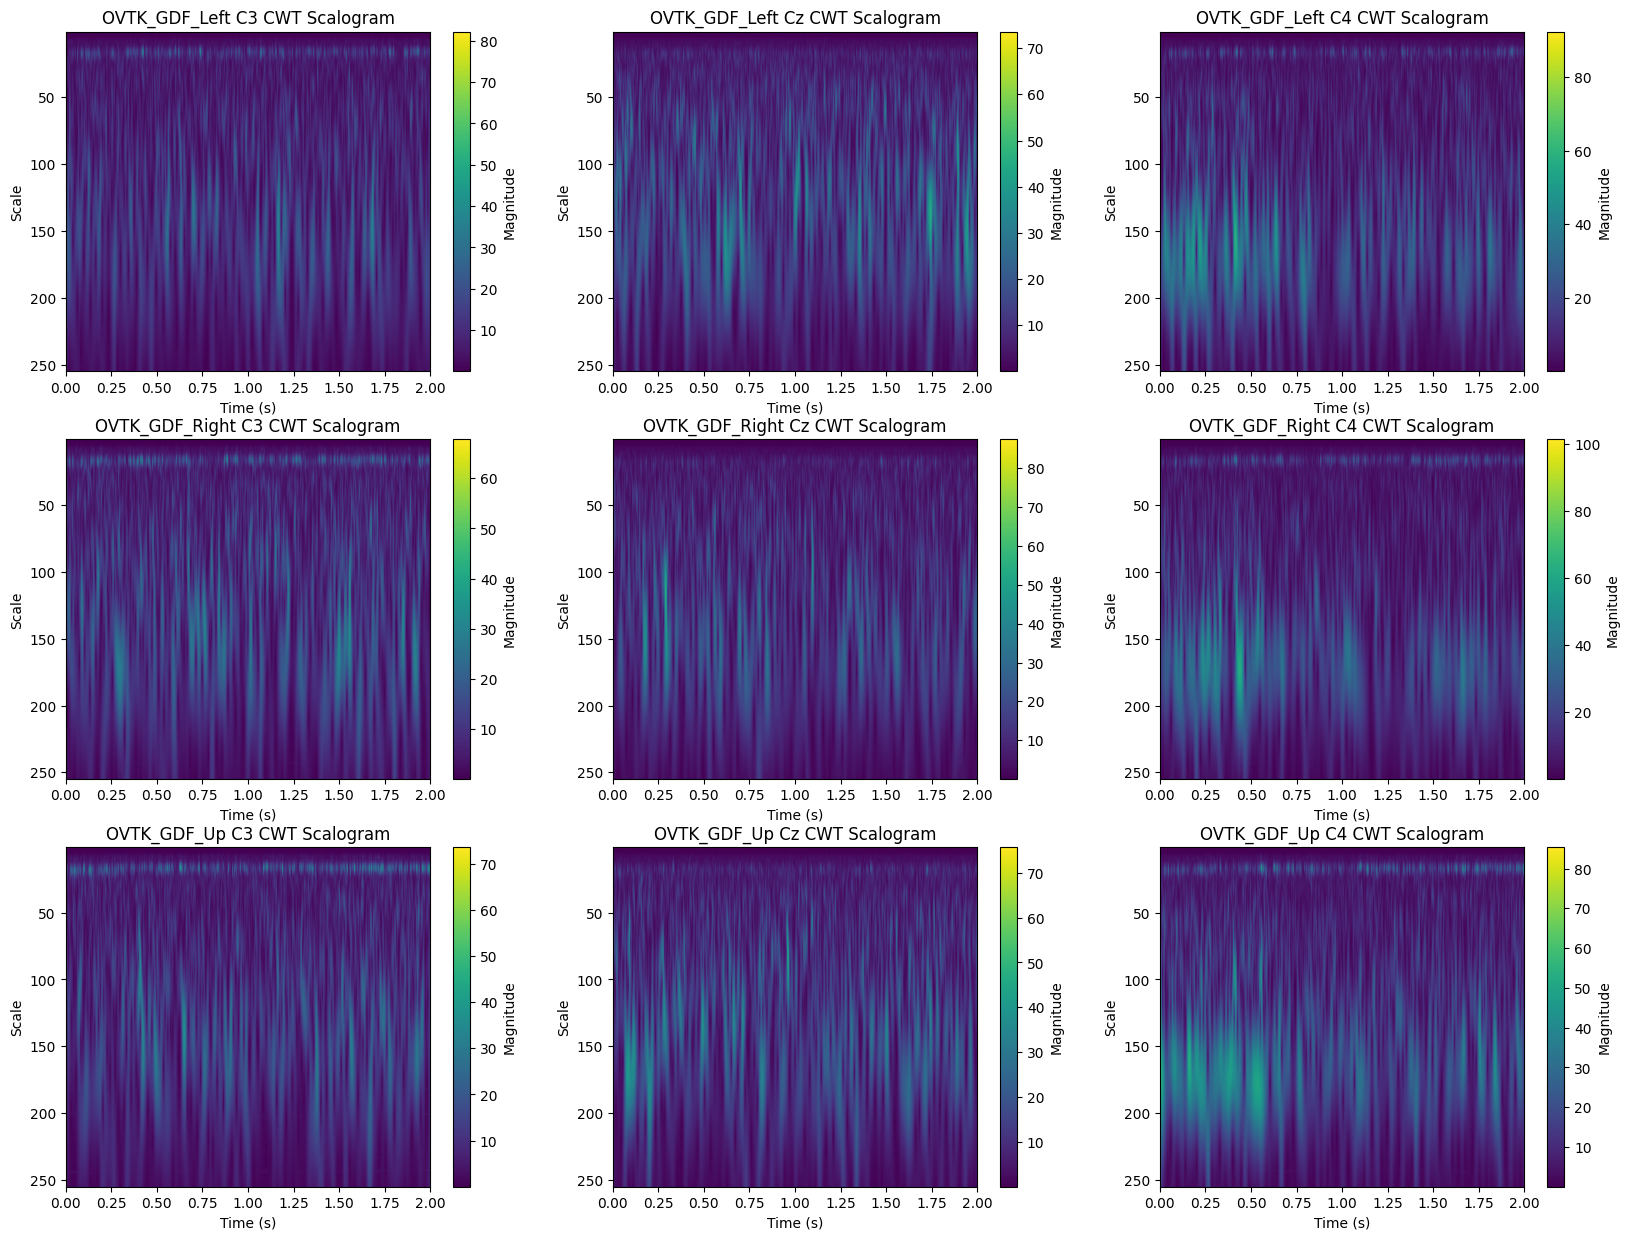

In [198]:
# Define the wavelet and scales
wavelet = 'morl'  # You can choose a different wavelet
scales = np.arange(1, 256)  # Adjust the scales as needed
count = 1
# Compute the Continuous Wavelet Transform (CWT)
fig = plt.figure(figsize= (20,15))

for j in range(0,3):
    CWT_df = CWT_epochs[epochs_name[j]].to_data_frame(scalings = dict(eeg=1, mag=1e15, grad=1e13)) # no scale
    for i in range(0,3):
        cwtmatr, _ = pywt.cwt(CWT_df[CWT_df.columns[i+4]], scales, wavelet)
        # Create the CWT scalogram image
        fig.add_subplot(330 + count)
        plt.imshow(np.abs(cwtmatr), extent=[0, 2, scales[-1], scales[0]], cmap='viridis', aspect='auto')
        plt.colorbar(label='Magnitude')
        plt.title(str(epochs_name[j])+' '+str(CWT_df.columns[i+4]) + ' CWT Scalogram')
        plt.xlabel('Time (s)')
        plt.ylabel('Scale')
        count+=1
plt.show()

In [199]:
np.shape(cwtmatr)

(255, 41280)

In [200]:
csp = CSP(n_components=3, reg=None, log=True, norm_trace=False)
labels = CWT_epochs.events[:, -1]
csp.fit_transform(CWT_epochs.get_data(), labels) 
CWT_CSP = csp.transform(CWT_epochs.get_data())

Computing rank from data with rank=None
    Using tolerance 1.4 (2.2e-16 eps * 5 dim * 1.2e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.4 (2.2e-16 eps * 5 dim * 1.3e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 1.5 (2.2e-16 eps * 5 dim * 1.4e+15  max singular value)
    Estimated rank (mag): 5
    MAG: rank 5 computed from 5 data channels with 0 projectors
Reducing data rank from 5 -> 5
Estimating covariance using EMPIRICAL
Done.


In [201]:
labels

array([3, 2, 1, 3, 2, 3, 3, 1, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 1, 2, 3, 2,
       1, 1, 3, 2, 1, 3, 3, 2, 1, 1, 2, 1, 3, 1, 1, 3, 3, 2, 1, 1, 2, 2,
       3, 2, 1, 2, 2, 1, 3, 2, 2, 2, 1, 3, 2, 1, 3, 2, 1, 3, 3, 1, 1, 3,
       2, 1, 3, 3, 2, 1, 3, 2, 2, 1, 3, 3, 3, 2, 3, 2, 1, 2, 1, 3, 3, 1,
       2, 1])

In [202]:
CWT_CSP = CWT_CSP.reshape(3,30)
for i in range(0,3):
    cwtmatr, _ = pywt.cwt(CWT_CSP[i], scales, wavelet)
    # Create the CWT scalogram image
    plt.figure(figsize= (10,7))
    plt.imshow(np.abs(cwtmatr), extent=[0, 2, scales[-1], scales[0]], cmap='viridis', aspect='auto')
    plt.colorbar(label='Magnitude')
    plt.title('CWT Scalogram' + 'CSP ' + str(i+1))
    plt.xlabel('Time (s)')
    plt.ylabel('Scale')
plt.show()

ValueError: cannot reshape array of size 270 into shape (3,30)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
count = 1
fig = plt.figure(figsize= (20,15))
# Compute the Short-Time Fourier Transform (STFT)
for j in range(0,3):
    CWT_df = CWT_epochs[epochs_name[j]].to_data_frame(scalings = dict(eeg=1, mag=1e15, grad=1e13)) # no scale
    for i in range(0,3):
        frequencies, times, Sxx = spectrogram(CWT_df[CWT_df.columns[i+4]], fs=250, nperseg=256, noverlap=128, window='hann')

        # Create the STFT scalogram image
        fig.add_subplot(330 + count)
        plt.imshow(10 * np.log10(Sxx), origin='lower', cmap='viridis', aspect='auto', extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
        plt.colorbar(label='Power Spectral Density (dB)')
        plt.title(str(epochs_name[j])+' '+str(CWT_df.columns[i+4]) + ' STFT Scalogram')
        plt.xlabel('Time (s)')
        plt.ylabel('Frequency (Hz)')
        count+=1
plt.show()


In [ ]:
# for i in range(0,3):
#     frequencies, times, Sxx = spectrogram(CWT_CSP[i], fs=250, nperseg=256, noverlap=128, window='hann')
#     # Create the STFT scalogram image
#     plt.figure(figsize= (10,7))
#     plt.imshow(10 * np.log10(Sxx), origin='lower', cmap='viridis', aspect='auto', extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
#     plt.colorbar(label='Power Spectral Density (dB)')
#     plt.title(str(epochs_name[j])+' '+str(CWT_df.columns[i+4]) + ' STFT Scalogram')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Frequency (Hz)')
#     plt.show()